We compare the residuals and the uncertainty estimates of all the models by making corner plots for them. This notebook shows how we do this.

In [1]:
import pickle
import numpy as np
import pandas as pd


# Load all the data
data_locations = {'NN ensemble': 'NN_ensemble',
                  'BNN': 'BNN', 
                  'Dropout NN': 'dropout',
                  'NN$\Delta$NN': 'NNdNN',
                  'GP': 'GP/Matern',
                  'GP$_{NN-\mu}$': 'GPnnm/Matern',
                  'CFGP': 'CFGP/Matern'}
residuals = {}
stdevs = {}
for method_name, results_location in data_locations.items():
    with open('../../../' + results_location + '/test_predictions.pkl', 'rb') as file_handle:
        residuals_, stdevs_ = pickle.load(file_handle)
    residuals[method_name] = residuals_.reshape(-1)
    stdevs[method_name] = stdevs_.reshape(-1)

# Format the data
residuals = pd.DataFrame(residuals)
stdevs = pd.DataFrame(stdevs)

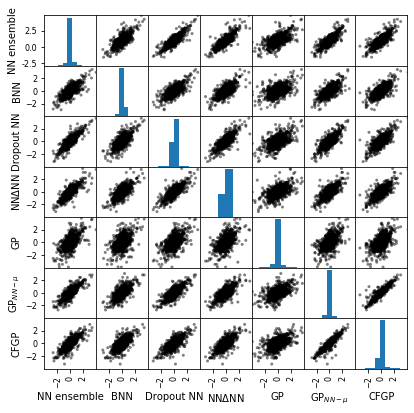

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


# Configs
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10
lims = (-4, 4)
xticks = [-2, 0, 2]
figsize = (6.5, 6.5)
color = 'k'

# Plot
resid_figs = scatter_matrix(residuals,
                            figsize=figsize,
                            c=color,
                           )

# Format
for i, row in enumerate(resid_figs):
    for j, ax in enumerate(row):
        ax.set_xlim(lims)
        ax.set_xticks(xticks)
        if i != j:  # Don't change the y limits of the histograms
            ax.set_ylim(lims)
            ax.set_yticks(xticks)

# Save
plt.savefig('residual_correlations.pdf', dpi=300)

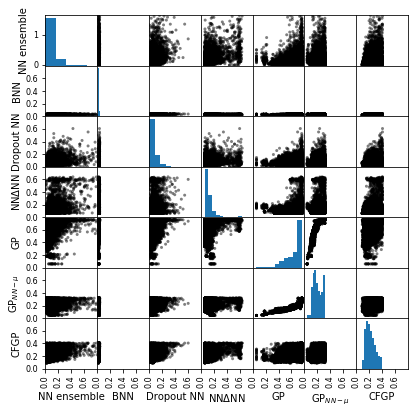

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


# Configs
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10
lims = (0, 0.8)
xticks = [0, 0.2, 0.4, 0.6]
figsize = (6.5, 6.5)
color = 'k'

# Plot
stdev_figs = scatter_matrix(stdevs,
                            figsize=figsize,
                            c=color,
                           )

# Format
for i, row in enumerate(stdev_figs):
    for j, ax in enumerate(row):
        ax.set_xlim(lims)
        ax.set_xticks(xticks)
        if i != j:  # Don't change the y limits of the histograms
            ax.set_ylim(lims)
            ax.set_yticks(xticks)

# Save
plt.savefig('stdev_correlations.pdf', dpi=300)